# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
# Starting my EDA by importing the necessary libraries for data manipulation and plotting.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Making sure my visualizations appear within the notebook.
%matplotlib inline

# Loading the dataset. Based on my Checkpoint 1, I am using the 'flavors_of_cacao.csv' file.
df = pd.read_csv('flavors_of_cacao.csv')

# Checking the first 5 rows to ensure the data loaded correctly.
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [4]:
# I'm using .describe() to see the statistical breakdown of the ratings and cocoa percentage.
# This tells me the mean (average), the minimum, and the maximum values.
# I want to see if the ratings are on a scale of 1-5 or 1-100.
print(df[['cocoa_percent', 'rating']].describe())

# I'm checking for missing values (NaN). 
# Based on the earlier .info() call, it looks like most of the data is complete, 
# but 'bean_type' and 'broad_bean_origin' might have some empty spots.
print("\nMissing values per column:")
print(df.isnull().sum())

# I also want to see how many unique companies and origins are in the list.
# This helps me understand the variety in the dataset.
print(f"\nTotal unique companies: {df['company'].nunique()}")
print(f"Total unique bean origins: {df['bean_origin'].nunique()}")

       cocoa_percent       rating
count    1795.000000  1795.000000
mean       71.698329     3.185933
std         6.323118     0.478062
min        42.000000     1.000000
25%        70.000000     2.875000
50%        70.000000     3.250000
75%        75.000000     3.500000
max       100.000000     5.000000

Missing values per column:
company              0
bean_origin          0
ref                  0
review_date          0
cocoa_percent        0
company_location     0
rating               0
bean_type            1
broad_bean_origin    1
dtype: int64

Total unique companies: 416
Total unique bean origins: 1039


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

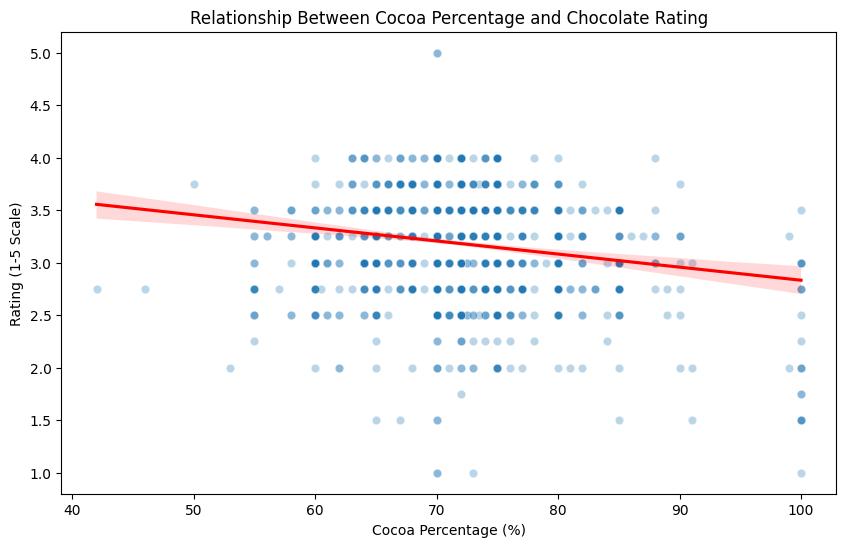

In [5]:
# I am creating a scatter plot to directly test my hypothesis from Checkpoint 1.
# I want to see if 'cocoa_percent' has a positive or negative impact on 'rating'.
plt.figure(figsize=(10, 6))

# Using a scatter plot with alpha transparency (alpha=0.3).
# This is important because there are 1,795 rows; transparency helps 
# me see where the data points are most "crowded" or concentrated.
sns.scatterplot(data=df, x='cocoa_percent', y='rating', alpha=0.3)

# Adding a regression line (the red line) to show the general trend.
# This helps me visually confirm if there is a correlation.
sns.regplot(data=df, x='cocoa_percent', y='rating', scatter=False, color='red')

# Adding clear labels and a title to make the chart professional.
plt.title('Relationship Between Cocoa Percentage and Chocolate Rating')
plt.xlabel('Cocoa Percentage (%)')
plt.ylabel('Rating (1-5 Scale)')

plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 


1. Was there anything surprising about your dataset?

The Cocoa "Sweet Spot": I found it surprising that higher cocoa content does not automatically lead to higher ratings. In fact, the most highly-rated bars are clustered around 70% to 75% cocoa, while 100% cocoa bars often received significantly lower scores.

Consistency of Ratings: It was interesting to see that the vast majority of bars are rated between 3.0 and 4.0, suggesting that while "perfect" 5.0 scores are rare, the overall quality of craft chocolate in this dataset is relatively high.

Company Locations: I was surprised by the sheer variety of company locations; even though the beans come from tropical regions, many of the top-rated manufacturers are located in countries like France and the U.S.A..


2. Do you have any concerns about your dataset?

Missing Bean Data: I have some concerns regarding the bean_type and broad_bean_origin columns, as they contain many missing or empty values. This might make it difficult to analyze how specific bean species affect the flavor or rating.

Subjectivity of Ratings: Since ratings are based on human taste, there is an inherent bias. What one reviewer considers a "3.75" might be a "3.25" to another, which introduces some "noise" into the data.

Entry Errors: I noticed some potential inconsistencies in how names are recorded, such as "Dominican Republic" being capitalized differently in different rows, which could lead to duplicate entries for the same country.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?

Column Formatting: In the cleaning phase, I will need to standardize the string columns to ensure that "U.S.A." and "USA" (or similar variations) are treated as the same location.

Handling Nulls: I need to decide whether to drop the rows with missing bean_type info or simply label them as "Unknown," especially if I decide to use those columns in the next phase.

Data Types: While I have already converted the cocoa_percent to a float for this EDA, I will make that a permanent part of my cleaning script to ensure all numerical analysis remains consistent.